In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

In [15]:
stocks = pd.read_csv("us_stocks.csv", header=[0,1], index_col= [0], parse_dates= [0])["Close"]

In [16]:
stocks.head(5)

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2009-12-31,40.52,nan,20.40,62.44,60.63,53.45
2010-01-04,40.92,nan,20.88,62.78,61.12,54.23
2010-01-05,40.83,nan,20.87,62.30,61.14,53.69
2010-01-06,41.49,nan,20.80,61.45,60.85,53.57
2010-01-07,41.98,nan,20.60,61.90,60.52,53.60


In [17]:
stocks = stocks.loc["2013-12-31":"2018-12-31"]   #select periods

In [18]:
stocks.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,91.33,124.95,44.84,174.15,90.97,87.13
2018-12-24,89.50,124.06,43.59,170.28,87.36,85.82
2018-12-26,93.84,134.18,46.19,174.03,90.09,90.41
2018-12-27,94.68,134.52,46.36,175.71,92.02,91.59
2018-12-28,94.42,133.20,46.75,175.56,91.18,92.13


In [20]:
norm = stocks.div(stocks.iloc[0]).mul(100) #normalizing values
norm

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69
...,...,...,...,...,...,...
2018-12-21,100.66,228.64,172.73,179.48,111.74,110.73
2018-12-24,98.64,227.01,167.91,175.49,107.31,109.06
2018-12-26,103.43,245.53,177.93,179.36,110.66,114.89


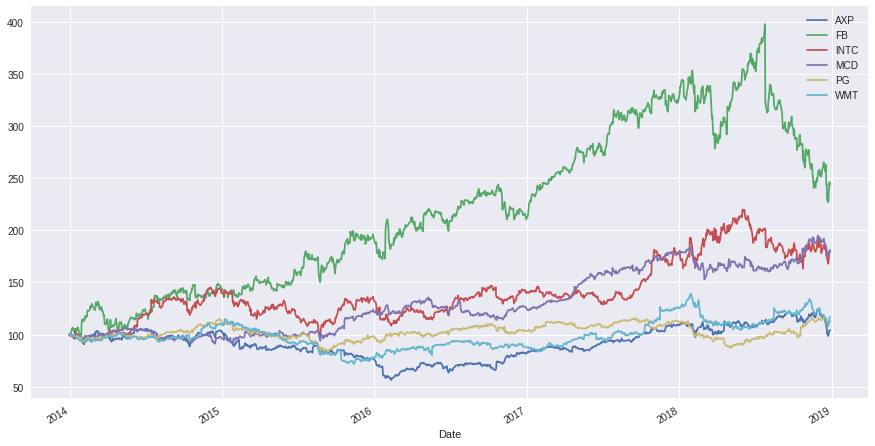

In [21]:
norm.plot(figsize = (15,8))
plt.show()

In [22]:
#Creating price weighted index (Price return)
norm["PWI"] = stocks.sum(axis=1).div(stocks.sum(axis= 1)[0]).mul(100)

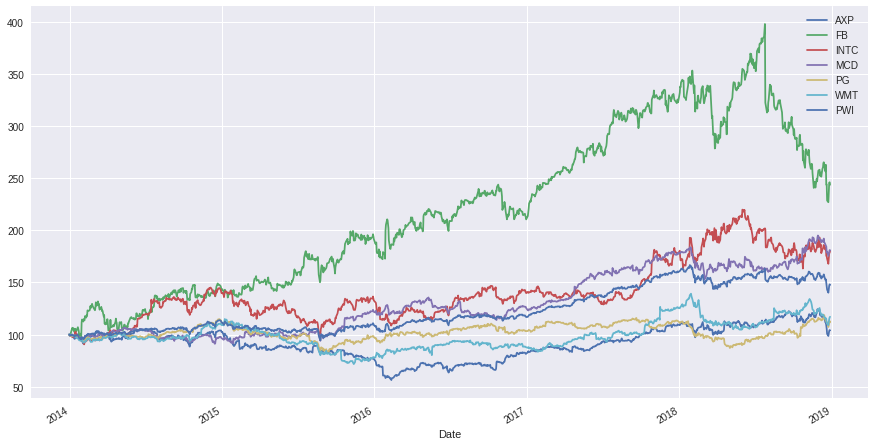

In [23]:
norm.plot(figsize = (15, 8))
plt.show()

In [24]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving listings_clean.csv to listings_clean.csv
User uploaded file "listings_clean.csv" with length 618856 bytes


In [25]:
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")

In [26]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [28]:
listings = listings.loc[stocks.columns, ["Last_Price", "Market_Cap"]]

In [29]:
listings.head()

,Last_Price,Market_Cap
Symbol,,
AXP,110.16,92396447733.60
FB,177.82,507496466236.00
INTC,55.75,250800765641.50
MCD,189.22,144813345561.04
PG,104.65,261790316546.85


In [30]:
#Calculate outstanding shares
listings["Shares"] = listings.Market_Cap.div(listings.Last_Price)

In [31]:
listings

,Last_Price,Market_Cap,Shares
Symbol,,,
AXP,110.16,92396447733.60,838747710.00
FB,177.82,507496466236.00,2853989800.00
INTC,55.75,250800765641.50,4498668442.00
MCD,189.22,144813345561.04,765317332.00
PG,104.65,261790316546.85,2501579709.00
WMT,99.60,285820549308.00,2869684230.00


In [32]:
mcap = stocks.mul(listings.Shares, axis = "columns")

In [33]:
mcap.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,76099582244.54,155970548277.98,116785428255.65,74258739958.64,203653614116.01,225815457798.07
2014-01-02,75025980143.26,156141779104.01,116020663617.85,73784247039.39,201477232264.44,226446794068.04
2014-01-03,75269217817.90,155713686341.99,115975676933.43,73883735996.60,201252080084.31,225700670428.87
2014-01-06,75235667070.76,163248219413.99,114536094034.65,73355664741.57,201727385232.18,224438000758.62
2014-01-07,74950496204.35,165303083508.02,115120925430.78,73761282162.21,203678614903.62,225126719234.45


NameError: ignored

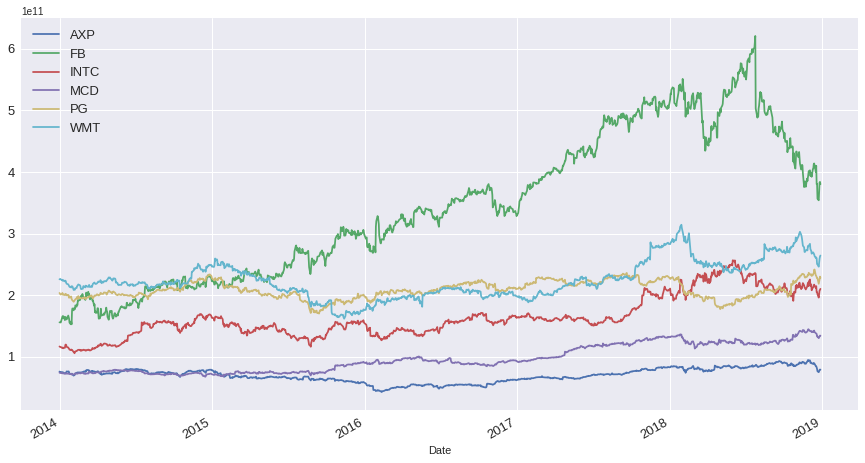

In [35]:
mcap.plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plot.show()

In [36]:
weights_vwi = mcap.div(mcap.sum(axis=1), axis = "index")

In [37]:
weights_vwi

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,0.09,0.18,0.14,0.09,0.24,0.26
2014-01-02,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-03,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-06,0.09,0.19,0.13,0.09,0.24,0.26
2014-01-07,0.09,0.19,0.13,0.09,0.24,0.26
...,...,...,...,...,...,...
2018-12-21,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-24,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-26,0.06,0.30,0.16,0.10,0.18,0.20


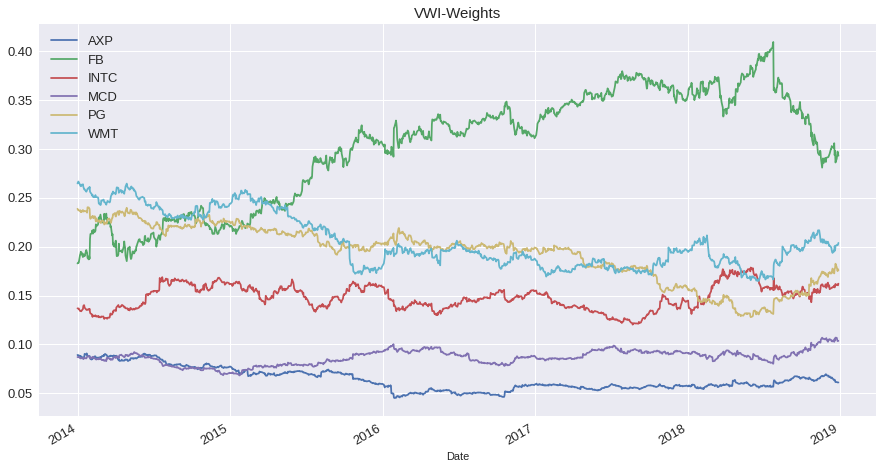

In [38]:
weights_vwi.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("VWI-Weights", fontsize = 15)
plt.show()

In [39]:
ret = stocks.pct_change().dropna()
ret.head(5)

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2014-01-02,-0.01,0.00,-0.01,-0.01,-0.01,0.00
2014-01-03,0.00,-0.00,-0.00,0.00,-0.00,-0.00
2014-01-06,-0.00,0.05,-0.01,-0.01,0.00,-0.01
2014-01-07,-0.00,0.01,0.01,0.01,0.01,0.00
2014-01-08,0.00,0.01,-0.01,-0.01,-0.01,-0.01


In [40]:
norm["VWI"] = 100
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI,VWI
Date,,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38,100
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36,100
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67,100
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15,100


In [41]:
norm.iloc[1:, -1] = ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [42]:
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI,VWI
Date,,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38,99.57
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36,99.44
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67,100.00
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15,100.63


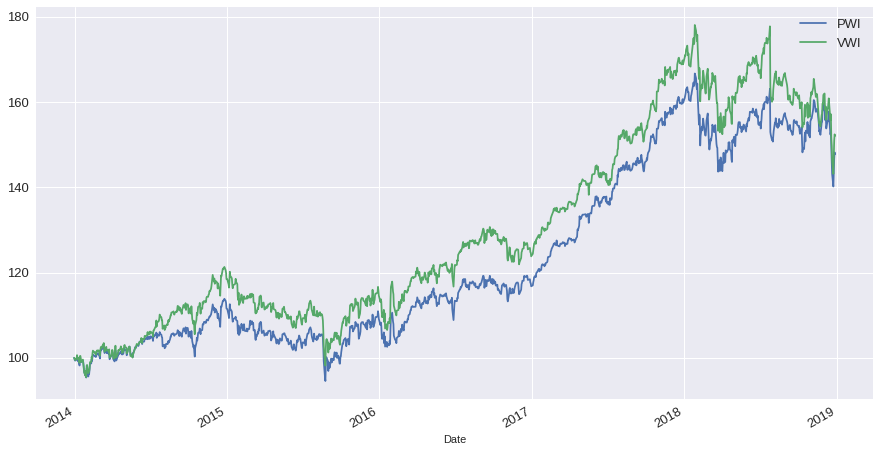

In [44]:
norm.iloc[:, -2:].plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()